In [1]:
# Load Data
import pandas as pd
df = pd.read_csv('../data/spam.csv', encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
# Check and clean missing values
df.isnull().sum()
df.dropna(inplace=True)


In [3]:
# Feature Engineering
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})
df['message_length'] = df['message'].apply(len)


In [4]:
# Summary Stats
df.describe()
df.groupby('label').describe()


label_num                                    message_length              \
          count mean  std  min  25%  50%  75%  max          count        mean   
label                                                                           
ham      4825.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0         4825.0   71.234197   
spam      747.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0          747.0  139.340027   

                                                    
             std   min    25%    50%    75%    max  
label                                               
ham    58.084357   2.0   33.0   52.0   92.0  910.0  
spam   29.318159  13.0  133.0  150.0  158.0  225.0

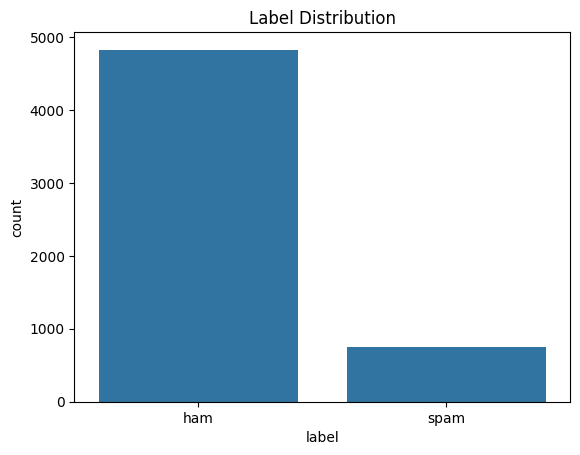

In [5]:
# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='label')
plt.title("Label Distribution")
plt.show()


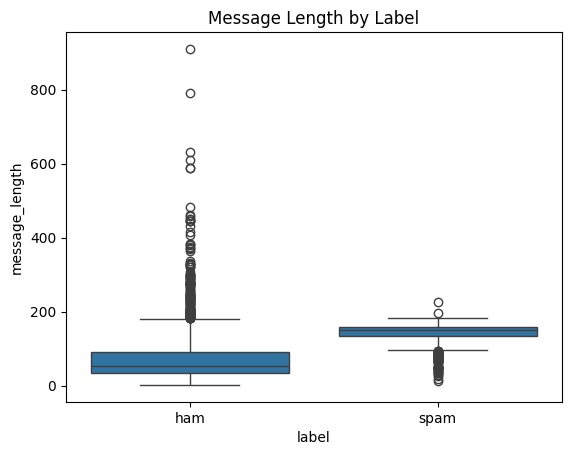

In [6]:
# Message Length Boxplot
sns.boxplot(data=df, x='label', y='message_length')
plt.title("Message Length by Label")
plt.show()


In [10]:
# Word Clouds
from wordcloud import WordCloud

spam_words = ' '.join(df[df.label=='spam']['message'])
ham_words = ' '.join(df[df.label=='ham']['message'])

WordCloud(background_color='white').generate(spam_words).to_image().show()
WordCloud(background_color='white').generate(ham_words).to_image().show()


In [8]:
# Save cleaned data
df.to_csv('../outputs/cleaned_data.csv', index=False)
